In [1]:
import os,sys
import matplotlib.pylab as plt
import pickle
import glob
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.style.use('default')
mpl.style.use('default')

plt.rcParams.update({
    'font.family': 'sans-serif',
	'font.sans-serif': 'Arial',
	'font.family': 'Arial',

    # Base font size (set so text is ~7–8 pt at final print size)
    'font.size': 8,                  # main text (labels, ticks, legend)
    'axes.labelsize': 9,             # axis labels (x/y)
    'axes.titlesize': 10,            # panel titles / figure titles
    'figure.titlesize':11,
    'xtick.labelsize': 8,            # x-tick labels
    'ytick.labelsize': 8,            # y-tick labels
    'legend.fontsize': 8,            # legend text
    'legend.title_fontsize': 9,      # legend title (if used)

    # Lines and elements for clarity
    'lines.linewidth': 1.2,          # data lines
    'axes.linewidth': 1.0,           # axis spines
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # General figure appearance
    'figure.dpi': 80,               # high resolution for export
    'savefig.dpi': 300,              # when using plt.savefig()
    'figure.figsize': (6.5, 4.5),    # example starting size (adjust to your needs; e.g., ~17 cm wide for full page)
    # 'figure.constrained_layout.use': True,
    'savefig.transparent': True,
    'pdf.fonttype':42,
	'ps.fonttype':42,
})
import pickle
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap as pch
# print(PyComplexHeatmap.__version__)

In [2]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df.head()

,AB,CD,EF,F
sample1,GroupA,C,E,0.254968
sample2,GroupA,C,E,-0.207245
sample3,GroupA,C,E,0.988746
sample4,GroupA,D,E,-0.766312
sample5,GroupA,D,E,1.244787


Plotting HeatmapAnnotations


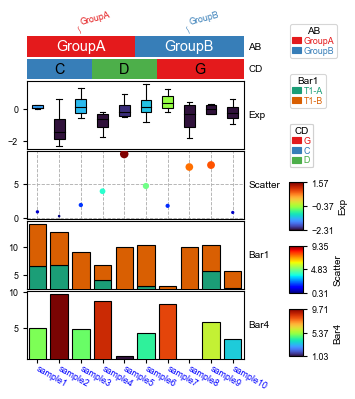

In [3]:
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan

plt.figure(figsize=(3.5, 5))
col_ha = pch.HeatmapAnnotation(label=pch.anno_label(df.AB, merge=True,rotation=15),
                            AB=pch.anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=pch.anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
                            Exp=pch.anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=pch.anno_scatterplot(df_scatter,grid=True), 
                           Bar1=pch.anno_barplot(df_bar1,legend=True,cmap='Dark2'),
                           Bar4=pch.anno_barplot(df_bar4,legend=True,cmap='turbo'),
                           plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

Plotting HeatmapAnnotations


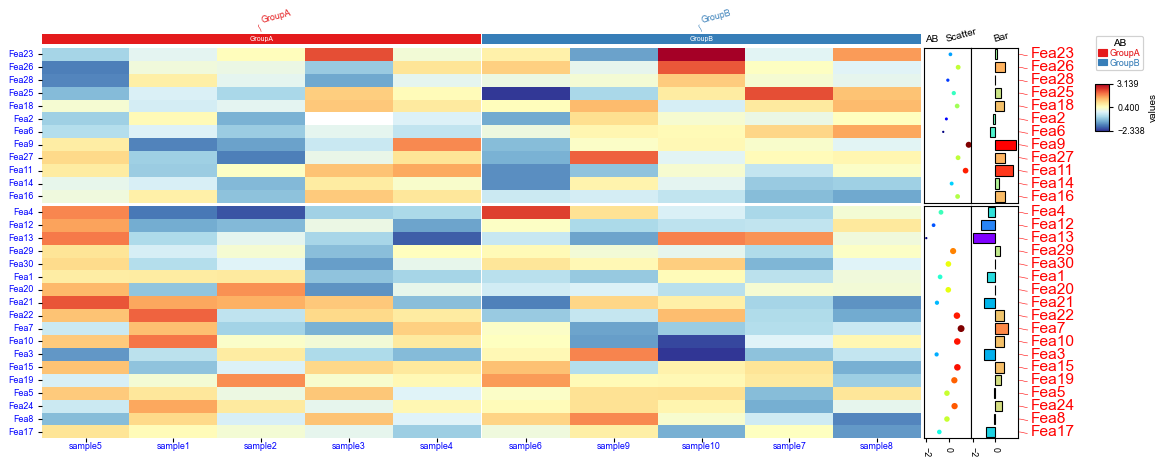

In [4]:
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows = df_heatmap.index
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

col_ha = pch.HeatmapAnnotation(label=pch.anno_label(df.AB, merge=True,rotation=15),
                            AB=pch.anno_simple(df.AB,add_text=True,legend=True), axis=1,
                           legend=True,legend_gap=5,hgap=0.5)

row_ha = pch.HeatmapAnnotation(
                           Scatter=pch.anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=15,cmap='jet',legend=False),
                           Bar=pch.anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=15,cmap='rainbow',legend=False),
                           selected=pch.anno_label(df_rows,colors='red',relpos=(-0.05,0.4),fontsize=14),
                           label_kws={'rotation':15,'horizontalalignment':'left','verticalalignment':'bottom'},
                            axis=0,verbose=0)

plt.figure(figsize=(16, 6))
cm = pch.ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_cluster=True,row_cluster=True,
                       col_split=df.AB,row_split=2, 
                       col_split_gap=0.5,row_split_gap=0.8,
                       label='values',row_dendrogram=False,
                       show_rownames=True,show_colnames=True,
                       tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
                       cmap='RdYlBu_r',
                       xticklabels_kws={'labelrotation':0,'labelcolor':'blue','bottom':True},
                       yticklabels_kws={'labelrotation':0,'labelcolor':'blue','left':True},
                          )
# plt.savefig("example0.pdf", bbox_inches='tight')
# from adjustText import adjust_text
# adjust_text(row_ha.annotations[-1].annotated_texts)
plt.show()